##5.1

In [ ]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('INTC.csv')
df['Date'] = pd.to_datetime(df['Date'])

dr=df['Close Price'].pct_change().fillna(0).mean()
dsr=df['Close Price'].pct_change().fillna(0).std()
ar=dr*252
asr=dsr*m.sqrt(252)

print('Mean Daily Return: ',dr)
print('Daily Standard Deviation: ',dsr)
print('Annual Mean: ',ar)
print('Annual Standard Deviation: ',asr)

Mean Daily Return:  -0.00030189654899702363
Daily Standard Deviation:  0.019538309871023455
Annual Mean:  -0.07607793034724995
Annual Standard Deviation:  0.31016105374347924


##5.2

In [ ]:
df=pd.DataFrame()
df_a=pd.read_csv('HDFCBANK.csv')
df['HDFCBANK']=df_a['Close Price']
df_b=pd.read_csv('HEROMOTOCO.csv')
df['HEROMOTOCO']=df_b['Close Price']
df_c=pd.read_csv('RAYMOND.csv')
df['RAYMOND']=df_c['Close Price']
df_d=pd.read_csv('TATAPOWER.csv')
df['TATAPOWER']=df_d['Close Price']
df_e=pd.read_csv('FORTIS.csv')
df['FORTIS']=df_e['Close Price']

print(df.head())

   HDFCBANK  HEROMOTOCO  RAYMOND  TATAPOWER  FORTIS
0   1553.40     3515.45   772.80      83.55  205.25
1   1583.00     3619.40   785.00      83.85  207.90
2   1559.65     3645.95   783.65      85.35  205.90
3   1557.15     3592.05   746.95      83.75  196.85
4   1600.00     3571.65   723.10      84.15  203.55


In [ ]:
daily_mean = df.pct_change().mean()
cov_matrix = df.pct_change().dropna().cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(daily_mean * weights) * 252,2)
portfolio_std = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio Annual Return: ', portfolio_return)
print('Portfolio Volatility: ', portfolio_std)

Portfolio Annual Return:  -0.01
Portfolio Volatility:  0.15


##5.3

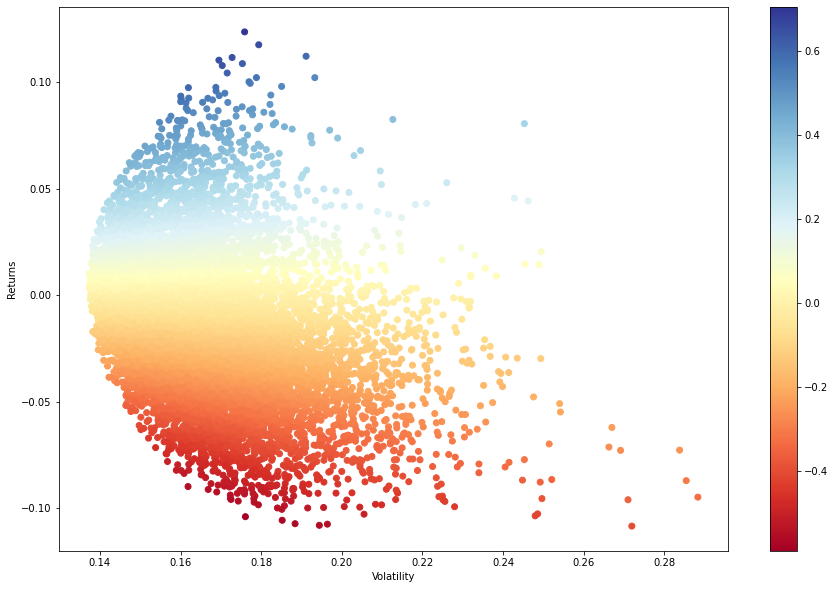

In [ ]:
daily_mean = df.pct_change().mean()
cov_matrix = df.pct_change().cov()
n = 10000
result = np.zeros((3, n))
for i in range(n):  
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(daily_mean * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    result[0,i] = portfolio_return
    result[1,i] = portfolio_std
    result[2,i] = result[0,i] / result[1,i]
result_frame = pd.DataFrame(result.T,columns=['Return','STD','Sharpe'])
plt.figure(figsize=(15,10))
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

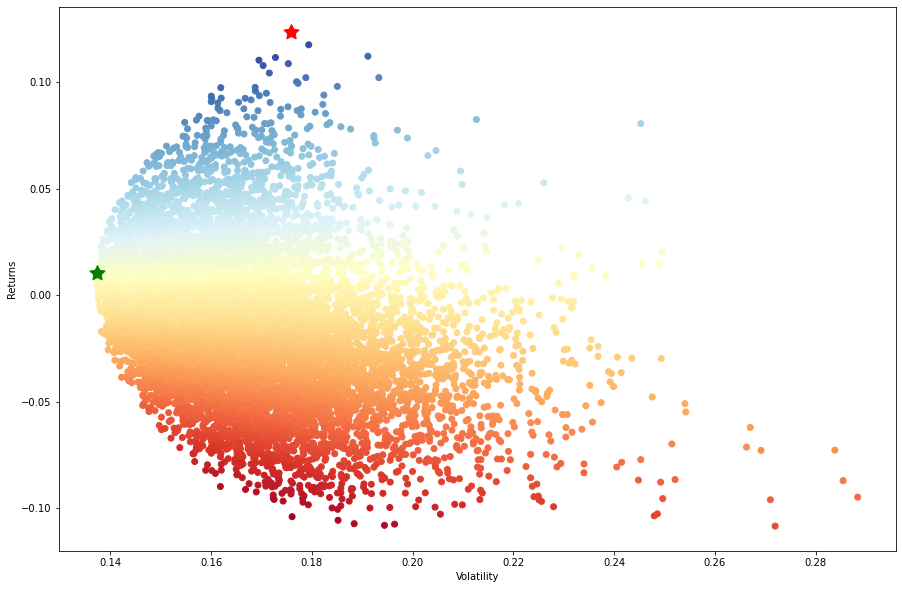

In [ ]:
plt.figure(figsize=(15,10))
max_sharpe_port = result_frame.iloc[result_frame['Sharpe'].idxmax()]
min_vol_port = result_frame.iloc[result_frame['STD'].idxmin()]
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility');
plt.ylabel('Returns');
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250);
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=250);


In [1]:
import sys
print(sys.version)


3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
